In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load CSV file into a DataFrame
file_path = "../data/train_normalize.csv"
train_df = pd.read_csv(file_path)

# Ensure all columns are displayed
pd.set_option("display.max_columns", None)

# Display first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,60,65.0,8450,1,0,100,100,100,60,100,6,60,60,100,90,7,5,2003,2003,80,60,70,70,85,196.0,80,65,100,80,65,20,100,706,10,0,150,856,100,100,1,100,856,854,0,1710,1,0,2,1,3,1,80,8,100,0,0,80,2003.0,66,2,548,65,65,100,0,61,0,0,0,0,0,0,0,0,2,2008,80,100,208500
1,2,20,60,80.0,9600,1,0,100,100,100,40,100,25,50,60,100,70,6,8,1976,1976,80,60,40,40,0,0.0,65,65,70,80,65,100,80,978,10,0,284,1262,100,100,1,100,1262,0,0,1262,0,1,2,0,3,1,50,6,100,1,65,80,1976.0,66,2,460,65,65,100,298,0,0,0,0,0,0,0,0,0,5,2007,80,100,181500
2,3,60,60,68.0,11250,1,0,75,100,100,60,100,6,60,60,100,90,7,5,2001,2002,80,60,70,70,85,162.0,80,65,100,80,65,40,100,486,10,0,434,920,100,100,1,100,920,866,0,1786,1,0,2,1,3,1,80,6,100,1,65,80,2001.0,66,2,608,65,65,100,0,42,0,0,0,0,0,0,0,0,9,2008,80,100,223500
3,4,70,60,60.0,9550,1,0,75,100,100,80,100,7,60,60,100,90,7,5,1915,1970,80,60,60,65,0,0.0,65,65,80,65,80,20,80,216,10,0,540,756,100,80,1,100,961,756,0,1717,1,0,1,0,3,1,80,7,100,1,80,60,1998.0,33,3,642,65,65,100,0,35,272,0,0,0,0,0,0,0,2,2006,80,20,140000
4,5,60,60,84.0,14260,1,0,75,100,100,40,100,16,60,60,100,90,8,5,2000,2000,80,60,70,70,85,350.0,80,65,100,80,65,70,100,655,10,0,490,1145,100,100,1,100,1145,1053,0,2198,1,0,2,1,4,1,80,9,100,1,65,80,2000.0,66,3,836,65,65,100,192,84,0,0,0,0,0,0,0,0,12,2008,80,100,250000


In [3]:
# Define X (features) and y (target)
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the Linear Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [5]:
# Display evaluation results
evaluation_results = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Value": [mae, rmse, r2]
})

print(evaluation_results)

                           Metric         Value
0       Mean Absolute Error (MAE)  22131.376870
1  Root Mean Squared Error (RMSE)  31368.163621
2                        R² Score      0.797338


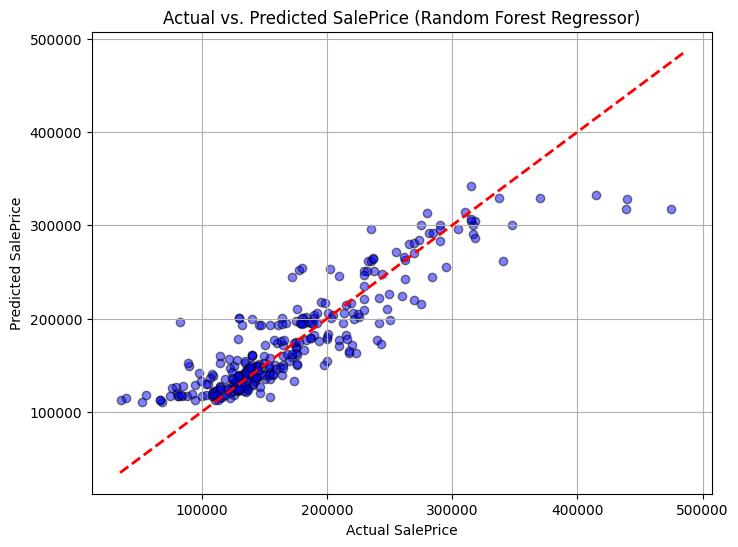

In [6]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red", linewidth=2)  # Ideal fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Random Forest Regressor)")
plt.grid(True)
plt.show()

In [7]:
# Load the test dataset into a DataFrame
test_path = "../data/test_normalize.csv"
test_df = pd.read_csv(test_path)

# Predict SalePrice using the trained model
predict = model.predict(test_df)

# Create a DataFrame to store results with Id and Predicted SalePrice
results_df = test_df[["Id"]].copy()
results_df["PredictedPrice"] = predict  

# Save the results to DataFrame as a CSV file
results_df.to_csv("../results/random_forest.csv", index=False)

print("CSV file saved successfully at: ../results/random_forest.csv")

CSV file saved successfully at: ../results/random_forest.csv
